In [2]:
# Name: Sanapala Satwika
# Roll number: 21ME10069

In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [46]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
])

In [37]:
import zipfile

with zipfile.ZipFile('/content/imbalanced_mnist (1).npz', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [41]:
class CustomDataset(Dataset):
  def __init__(self, x_path, y_path, transform=None):
    self.x_data = np.load(x_path)
    self.y_data = np.load(y_path)
    self.transform = transform

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = self.x_data[idx]
    y = self.y_data[idx]

    if self.transform:
      x = self.transform(x)

    return x,y


train_x_path = '/content/X_train.npy'
train_y_path = '/content/y_train.npy'
test_x_path = '/content/X_test.npy'
test_y_path = '/content/y_test.npy'

train_dataset =CustomDataset(train_x_path, train_y_path, transform = transform)
test_dataset = CustomDataset(test_x_path, test_y_path)

In [42]:
train_size = int(0.8*len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset,[train_size, val_size])

In [43]:
# Create data loaders
train_loader =DataLoader(train_dataset, batch_size=32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle= False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [44]:
#neural network model
class NeuralNet(nn.Module):
  def __init__(self, input_size=784, hidden_size=128, num_classes=10):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    x=x.view(x.size(0), -1)
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    return x

In [52]:
import torch.optim as optim

Epoch [1/10], Train Loss: 2.1795, Validation Loss: 2.0256
Epoch [2/10], Train Loss: 1.8358, Validation Loss: 1.6290
Epoch [3/10], Train Loss: 1.4376, Validation Loss: 1.2504
Epoch [4/10], Train Loss: 1.1142, Validation Loss: 0.9834
Epoch [5/10], Train Loss: 0.9002, Validation Loss: 0.8141
Epoch [6/10], Train Loss: 0.7642, Validation Loss: 0.7049
Epoch [7/10], Train Loss: 0.6739, Validation Loss: 0.6304
Epoch [8/10], Train Loss: 0.6103, Validation Loss: 0.5767
Epoch [9/10], Train Loss: 0.5634, Validation Loss: 0.5365
Epoch [10/10], Train Loss: 0.5277, Validation Loss: 0.5054
Epoch [1/10], Train Loss: 1.0771, Validation Loss: 0.5121
Epoch [2/10], Train Loss: 0.4384, Validation Loss: 0.3812
Epoch [3/10], Train Loss: 0.3632, Validation Loss: 0.3435
Epoch [4/10], Train Loss: 0.3295, Validation Loss: 0.3174
Epoch [5/10], Train Loss: 0.3072, Validation Loss: 0.2989
Epoch [6/10], Train Loss: 0.2888, Validation Loss: 0.2860
Epoch [7/10], Train Loss: 0.2732, Validation Loss: 0.2703
Epoch [8/10],

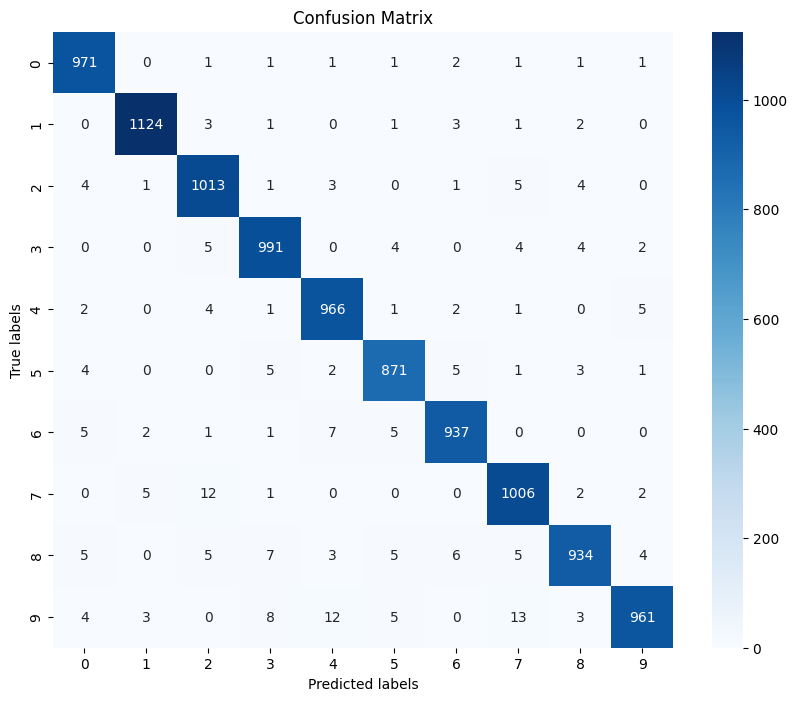

In [51]:
# Define hyperparameters grid
hidden_sizes = [128, 256, 512]
learning_rates = [0.001, 0.01, 0.1]
best_accuracy = 0
best_hyperparameters = None

# Hyperparameter Tuning
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        model = NeuralNet(hidden_size=hidden_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)

        train_losses, validation_losses = train_model(model, criterion, optimizer, train_loader, val_loader)

        # Evaluate model on validation set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {'hidden_size': hidden_size, 'learning_rate': lr}

# Train the model using the best hyperparameters
best_model = NeuralNet(hidden_size=best_hyperparameters['hidden_size'])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(best_model.parameters(), lr=best_hyperparameters['learning_rate'])

train_losses, validation_losses = train_model(best_model, criterion, optimizer, train_loader, val_loader)


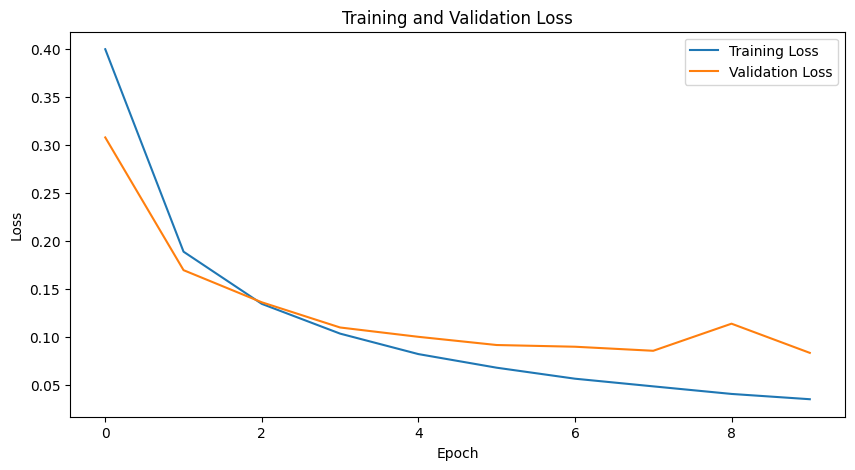

In [53]:
# Visualize training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [55]:
def evaluate_model(model, criterion, data_loader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    average_loss = total_loss / len(data_loader)
    return accuracy, average_loss

# Evaluate the model on test set
test_accuracy = evaluate_model(best_model, criterion, test_loader)
print(test_accuracy)

(0.9774, 0.07809960060601737)


In [56]:
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([512, 784])
torch.Size([512])
torch.Size([10, 512])
torch.Size([10])


Model Analysis

In [80]:
# Calculate parameters
def calculate_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

ffnn_parameters = calculate_parameters(best_model)

print(f"FNN: Number of Parameters - {ffnn_parameters}")

FNN: Number of Parameters - 20490


In [ ]:
from flopth import flopth
ffnn_flops, ffnn_params = flopth(model, in_size=(20,),show_detail=True)
print(ffnn_flops, ffnn_params)

**Model Architecture**

#### Model Architecture Description

The neural network model used in this project is a multi-layer perceptron (MLP) designed for classifying grayscale images of handwritten digits from the MNIST dataset. Here's a breakdown of the layers used in the model:

##### 1. Input Layer:
- Purpose: Receives input images of size 28x28 pixels.
- Functionality: Each pixel value represents the intensity of the corresponding pixel in the image.

##### 2. Hidden Layers:
- Purpose: Perform nonlinear transformations on the input features to learn hierarchical representations.
- Functionality: Each hidden layer consists of densely connected neurons with ReLU activation functions. The number of neurons in each hidden layer is a hyperparameter that can be tuned.

##### 3. Output Layer:
- Purpose: Produces the final classification probabilities for each digit (0-9).
- Functionality: The output layer is a fully connected layer with 10 neurons, each representing the probability of the input image belonging to a particular digit class. It utilizes a softmax activation function to convert raw scores into probabilities.

#### Connectivity and Overall Architecture:

- The input layer is connected to the first hidden layer, and subsequent hidden layers are sequentially connected to each other.
- Each hidden layer applies a linear transformation followed by a ReLU activation function to its input.
- The output layer receives the output of the last hidden layer and produces the final classification probabilities.
- During training, the model learns to minimize the cross-entropy loss between predicted probabilities and ground truth labels using the Adam optimizer.

### Conclusion

The MLP architecture leverages multiple hidden layers with ReLU activation functions to learn complex patterns in the input images, enabling accurate classification of handwritten digits. By tuning the number of neurons in each hidden layer and the learning rate, the model's performance can be optimized for improved accuracy and generalization.

**QUESTION 2 :
CNN Model for MNIST Classification**

Model Architecture

In [60]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(7*7*32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

**Model Architecture Description**


###Convolutional Layer 1:

-> Detects simple patterns like edges or textures in the input images.Applies a set of filters to the input image to create feature maps.Takes the raw input image and produces feature maps.

###ReLU Activation 1:

-> Introduces non-linearity to the model.Applies the ReLU activation function to the feature maps, which helps in capturing complex patterns.Receives feature maps from the convolutional layer and outputs transformed feature maps.

###Max Pooling Layer 1:

-> Reduces the spatial dimensions of the feature maps while retaining important information.Performs max pooling operation, selecting the maximum value from each patch of the feature maps.Receives feature maps from the ReLU activation layer and outputs downsampled feature maps.

###Convolutional Layer 2:

-> Extracts higher-level features by combining information from different parts of the image.Applies a new set of filters to the downsampled feature maps to create deeper representations.Takes downsampled feature maps from the max pooling layer and produces new feature maps.

###ReLU Activation 2:

-> Further enhances the model's ability to capture complex patterns.Applies the ReLU activation function to the feature maps from the second convolutional layer.Receives feature maps from the second convolutional layer and outputs transformed feature maps.

###Max Pooling Layer 2:

-> Continues reducing the spatial dimensions, focusing on the most relevant information.Performs max pooling operation on the feature maps from the second ReLU layer.Takes feature maps from the second ReLU activation layer and outputs further downsampled feature maps.

###Fully Connected (Linear) Layer:

-> Makes the final decision about the image's class based on the extracted features.Applies a linear transformation to the flattened feature maps, mapping them to the output classes.Takes flattened feature maps from the second max pooling layer and produces output logits for classification.

In [70]:
# Calculate the size of the tensor after the convolutional and pooling layers
def calculate_conv_output_size(input_size, kernel_size, stride, padding):
    output_size = ((input_size - kernel_size + 2 * padding) / stride) + 1
    return int(output_size)

# Example usage:
input_size = 28  # Assuming input image size is 28x28
conv1_output_size = calculate_conv_output_size(input_size, kernel_size=3, stride=1, padding=1)
pool1_output_size = calculate_conv_output_size(conv1_output_size, kernel_size=2, stride=2, padding=0)
conv2_output_size = calculate_conv_output_size(pool1_output_size, kernel_size=3, stride=1, padding=1)
pool2_output_size = calculate_conv_output_size(conv2_output_size, kernel_size=2, stride=2, padding=0)

print("Output size after Conv1:", conv1_output_size)
print("Output size after Pool1:", pool1_output_size)
print("Output size after Conv2:", conv2_output_size)
print("Output size after Pool2:", pool2_output_size)


Output size after Conv1: 28
Output size after Pool1: 14
Output size after Conv2: 14
Output size after Pool2: 7


2. Hyperparameter Tuning

In [61]:
# Define hyperparameters grid
filters = [(16, 32), (32, 64), (64, 128)]
learning_rates = [0.001, 0.01, 0.1]
best_accuracy = 0
best_hyperparameters = None

# Loop through the grid
for filter_sizes in filters:
    for lr in learning_rates:
        model = CNN()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        train_losses, validation_losses = train_model(model, criterion, optimizer, train_loader, val_loader)
        val_accuracy, _ = evaluate_model(model, criterion, val_loader)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_hyperparameters = {'filters': filter_sizes, 'learning_rate': lr}


Epoch [1/10], Train Loss: 0.2326, Validation Loss: 0.0887
Epoch [2/10], Train Loss: 0.0740, Validation Loss: 0.0609
Epoch [3/10], Train Loss: 0.0550, Validation Loss: 0.0582
Epoch [4/10], Train Loss: 0.0431, Validation Loss: 0.0527
Epoch [5/10], Train Loss: 0.0364, Validation Loss: 0.0511
Epoch [6/10], Train Loss: 0.0294, Validation Loss: 0.0532
Epoch [7/10], Train Loss: 0.0251, Validation Loss: 0.0519
Epoch [8/10], Train Loss: 0.0198, Validation Loss: 0.0525
Epoch [9/10], Train Loss: 0.0186, Validation Loss: 0.0543
Epoch [10/10], Train Loss: 0.0151, Validation Loss: 0.0510
Epoch [1/10], Train Loss: 0.1875, Validation Loss: 0.1126
Epoch [2/10], Train Loss: 0.0980, Validation Loss: 0.0816
Epoch [3/10], Train Loss: 0.0893, Validation Loss: 0.0873
Epoch [4/10], Train Loss: 0.0875, Validation Loss: 0.0860
Epoch [5/10], Train Loss: 0.0849, Validation Loss: 0.0787
Epoch [6/10], Train Loss: 0.0779, Validation Loss: 0.0948
Epoch [7/10], Train Loss: 0.0805, Validation Loss: 0.1191
Epoch [8/10],

Model Training and Evaluation

In [62]:
# Train the model using the best hyperparameters
best_model = CNN()
optimizer = optim.Adam(best_model.parameters(), lr=best_hyperparameters['learning_rate'])
criterion = nn.CrossEntropyLoss()
train_losses, validation_losses = train_model(best_model, criterion, optimizer, train_loader, val_loader)


Epoch [1/10], Train Loss: 0.2315, Validation Loss: 0.0792
Epoch [2/10], Train Loss: 0.0727, Validation Loss: 0.0751
Epoch [3/10], Train Loss: 0.0539, Validation Loss: 0.0496
Epoch [4/10], Train Loss: 0.0430, Validation Loss: 0.0525
Epoch [5/10], Train Loss: 0.0362, Validation Loss: 0.0543
Epoch [6/10], Train Loss: 0.0296, Validation Loss: 0.0555
Epoch [7/10], Train Loss: 0.0257, Validation Loss: 0.0455
Epoch [8/10], Train Loss: 0.0219, Validation Loss: 0.0473
Epoch [9/10], Train Loss: 0.0188, Validation Loss: 0.0515
Epoch [10/10], Train Loss: 0.0160, Validation Loss: 0.0550


Validation Accuracy: 0.9854, Validation Loss: 0.0548
Test Accuracy: 0.9866, Test Loss: 0.0444


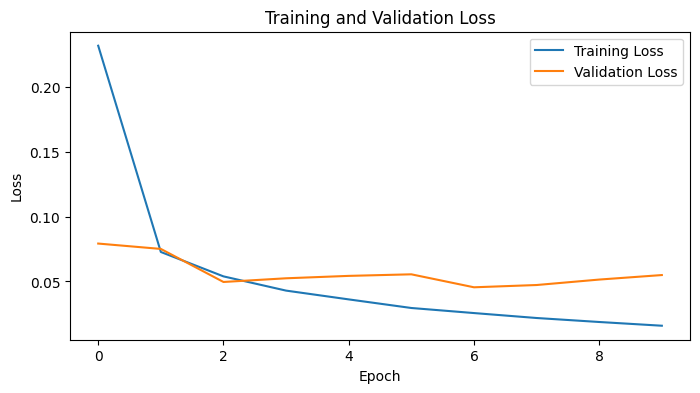

In [65]:
# Evaluate the model on validation set
val_accuracy, val_loss = evaluate_model(best_model, criterion, val_loader)
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate the model on test set
test_accuracy, test_loss = evaluate_model(best_model, criterion, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Visualize training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import precision_score, recall_score

def calculate_precision_recall(model, data_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return precision, recall

# Calculate precision and recall
precision, recall = calculate_precision_recall(best_model, test_loader)
print(f"Precision: {precision}, Recall: {recall}")

Precision: 0.986631336030619, Recall: 0.9864951253266122


In [67]:
import torch.autograd.profiler as profiler

In [81]:
def calculate_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [74]:
for parameter in model.parameters():
    print(parameter.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [79]:
# Calculate and compare the number of trianble parameters
cnn_parameters = calculate_parameters(best_model)
print(f"CNN: Number of Parameters - {cnn_parameters}")

CNN: Number of Parameters - 20490


In [ ]:
# Calculate and compare the number of  FLOPs
from flopth import flopth
cnn_flops, cnn_params = flopth(model, in_size=(20,),show_detail=True)
print(cnn_flops, cnn_params)

In [ ]:
# Compare the number of trainable parameters and FLOPs
print(f"CNN: Number of Parameters - {cnn_parameters}, FLOPs - {cnn_flops}")
print(f"Feedforward NN: Number of Parameters - {ffnn_parameters}, FLOPs - {ffnn_flops}")